In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'

device = torch.device("cpu")

### Define network

In [2]:
class STM(nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        Initialize the attributes of STM.
        """
        super(STM, self).__init__() # inherit the __init__ from nn.Module.
        
        self.input=torch.rand(D_in)            
        self.linear1=nn.Linear(D_in, H)
        self.linear2=nn.Linear(H, D_out)
        self.x = self.init_x()            # initialize self.x with method init_x().
        
    def init_x(self):
        """
        Initialize self.x with two neurons.
        """
        return nn.Parameter(self.input)
        
    def forward(self):
        """
        Forward propagation.
        """
        h_relu = self.linear1(self.x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        
        return y_pred

### Predefined parameters

In [3]:
# Average energy
E_mean=3
# D_in=Input dimensions, H=Hidden dimension, D_out=Number of classes
D_in, H, D_out = 2, 100, 64
# Learning rate
lr=0.05
# Number of SGD optimization
num_ops=5000

### Predefined data

Target distribution is a uniform distribution. It therefore represents a stationary distribution at a very high temperature.

In [4]:
y=torch.ones(D_out)/D_out

### Predefined functions

In [5]:
softmax=torch.nn.Softmax(dim=-1)

### Building model

For simplicity, I use Mean Square Error (MSE) here. In practice it should work with cross entropy loss.

In [6]:
model = STM(D_in, H, D_out)

loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

### Model output before training

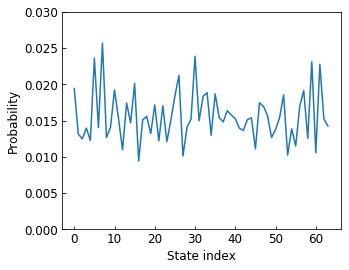

In [7]:
# Data
init_dist = softmax(model()).detach().numpy()

# Plot
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(init_dist)
ax.set_xlabel('State index', size=12)
ax.set_ylabel('Probability', size=12)
ax.set_ylim(0.0,0.03)
ax.tick_params(axis='both', which='major', direction='in', labelsize=12)
plt.show()

### Training

In [8]:
for i in range(num_ops):
    
    Y=model()
    loss = loss_fn(y,softmax(Y)) 
    
    if i % 500 == 499:
        print(i, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

499 0.0005152793601155281
999 0.00035560893593356013
1499 0.00025364174507558346
1999 0.0001843897916842252
2499 0.00013556896010413766
2999 0.00010033192666014656
3499 7.451593410223722e-05
3999 5.542557482840493e-05
4499 4.123173130210489e-05
4999 3.0649014661321416e-05


### Model output after training

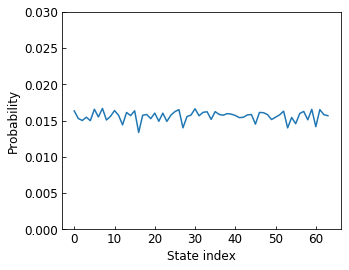

In [9]:
# Data
final_dist = softmax(model()).detach().numpy()

# Plot
fig, ax=plt.subplots(figsize=(5,4))
ax.plot(final_dist)
ax.set_xlabel('State index', size=12)
ax.set_ylabel('Probability', size=12)
ax.set_ylim(0.0,0.03)
ax.tick_params(axis='both', which='major', direction='in', labelsize=12)
plt.show()